# Modelo probabilista (apartado b)
## Clasificación por categoría de turbulencia

### Lectura de los datos

In [1]:
import pandas as pd

df_train = pd.read_parquet("../data/train.parquet")
df_test = pd.read_parquet("../data/test.parquet")

### Exploración inicial

In [2]:
df_train["turbulence_category"].value_counts()

turbulence_category
Medium 2                39649
High vortex aircraft    34752
Medium 1                26945
Heavy                   14215
High performance         4280
Light                    3892
Name: count, dtype: int64

In [3]:
df_test["turbulence_category"].value_counts()

turbulence_category
Medium 2                9322
High vortex aircraft    8427
Medium 1                5354
Heavy                   2938
High performance         935
Light                    815
Name: count, dtype: int64

Vemos que hay una gran diferencia entre unas clases y otras. Vamos a agrupar por día y callsign, y elegir un mensaje aleatorio de cada agrupación. De esta forma trataremos de reducir estas diferencias.

In [4]:
import pandas as pd

# Crear una nueva columna 'date' solo con la fecha (sin la hora)
df_train['date'] = df_train['timestamp'].dt.date
df_test['date'] = df_test['timestamp'].dt.date

# Agrupar por 'callsign' y 'date' y elegir una fila aleatoria de cada grupo
df_train = df_train.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)
df_test = df_test.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)

/tmp/ipykernel_136717/3883204618.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train = df_train.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)
/tmp/ipykernel_136717/3883204618.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_test.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)


In [48]:
df_train["turbulence_category"].value_counts()

turbulence_category
Medium 2                1545
High vortex aircraft    1250
Medium 1                1058
Heavy                    557
Light                    173
High performance         169
Name: count, dtype: int64

In [5]:
df_test["turbulence_category"].value_counts()

turbulence_category
Medium 2                382
High vortex aircraft    316
Medium 1                240
Heavy                   132
High performance         39
Light                    38
Name: count, dtype: int64

### Preparación de los datos

Preprocesamiento de las características

In [6]:
from sklearn.preprocessing import LabelEncoder
# Codificar la variable objetivo en números
le = LabelEncoder()
df_train['turbulence_category'] = le.fit_transform(df_train['turbulence_category'])
df_test['turbulence_category'] = le.transform(df_test['turbulence_category'])

# Separar las características (features) y las etiquetas (labels)
y_train = df_train['turbulence_category']
df_train = df_train.drop(columns=['turbulence_category'])

y_test = df_test['turbulence_category']
df_test = df_test.drop(columns=['turbulence_category'])

In [7]:
pd.set_option('display.max_columns', None)
df_train.head()

,takeoff_time,timestamp,icao,callsign,holding_point,runway,operator,last_min_takeoffs,last_min_landings,last_event_turb_cat,time_since_last_event_seconds,time_before_holding_point,time_at_holding_point,hour,weekday,is_holiday,Z1,KA6,KA8,K3,K2,K1,Y1,Y2,Y3,Y7,Z6,Z4,Z2,Z3,LF,L1,LA,LB,LC,LD,LE,36R_18L,32R_14L,36L_18R,32L_14R,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snowfall (cm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),is_day (),wind_speed_10m (km/h),wind_direction_10m (°),wind_direction_100m (°),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),date
0,148.0,2024-11-15 10:09:35.613,347257,1WE_____,K2,32R/14L,1WE,1,1,High vortex aircraft,71,544.0,11.0,10,Fri,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,10.4,94,9.4,0.0,0.0,3,950.3,100,41,19,100,1,9.5,44,61,0.219,20.7,0.141,0.01,2024-11-15
1,116.0,2024-12-11 10:41:31.624,0A404C,7TVPE___,K1,32R/14L,7TV,1,0,Medium 1,546,5675.0,0.0,10,Wed,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,3.8,76,0.0,0.0,0.0,3,946.9,100,100,100,0,1,6.5,19,39,0.171,18.7,0.141,0.02,2024-12-11
2,106.0,2024-11-28 06:17:35.646,06A1DD,A7CHD___,Y2,36R/18L,A7C,1,0,High vortex aircraft,61,7500.0,22.0,6,Thu,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1.7,95,0.9,0.0,0.0,0,953.9,13,0,0,13,0,4.9,10,50,0.208,19.8,0.141,0.00,2024-11-28
3,112.0,2024-12-13 12:11:37.782,4D2056,AAE123__,Y1,36R/18L,AAE,1,1,Light,74,2535.0,0.0,12,Fri,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,5.1,89,3.4,0.0,0.0,3,951.9,100,100,33,0,1,1.5,111,129,0.182,18.5,0.141,0.03,2024-12-13
4,99.0,2024-12-20 11:16:50.092,4D2056,AAE123__,Y1,36R/18L,AAE,2,0,Medium 2,60,1238.0,35.0,11,Fri,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,4.4,73,0.0,0.0,0.0,0,959.8,4,4,0,0,1,9.1,9,18,0.147,17.9,0.141,0.04,2024-12-20


In [8]:
# Booleanas True/False a enteros 1/0
bool_cols = ['Z1', 'KA6', 'KA8', 'K3', 'K2', 'K1', 'Y1', 'Y2', 'Y3', 'Y7', 'Z6', 'Z4', 
             'Z2', 'Z3', 'LF', 'L1', 'LA', 'LB', 'LC', 'LD', 'LE', '36R_18L', '32R_14L', '36L_18R', '32L_14R', 'is_holiday']

df_train[bool_cols] = df_train[bool_cols].astype(int)
df_test[bool_cols] = df_test[bool_cols].astype(int)

In [9]:
# --- Codificamos "operator" reduciendo el número de aerolíneas ---

# Paso 1: Encontrar las 7 aerolíneas más frecuentes en train
top_operators = df_train['operator'].value_counts().nlargest(7).index.tolist()

# Paso 2: Crear nueva columna, donde:
# - Si el operator está en top_operators → lo dejamos igual
# - Si no → lo reemplazamos por "other"

def map_operator(op):
    return op if op in top_operators else 'other'

df_train['operator_grouped'] = df_train['operator'].apply(map_operator)
df_test['operator_grouped'] = df_test['operator'].apply(map_operator)

In [10]:
# --- OneHot Encoding ---
ohe_cols = ['operator_grouped', 'runway', 'holding_point', 'last_event_turb_cat', 'weekday']

df_train = pd.get_dummies(df_train, columns=ohe_cols, drop_first=False, dtype="int")
df_test = pd.get_dummies(df_test, columns=ohe_cols, drop_first=False, dtype="int")

In [11]:
# --- Normalizamos columnas numéricas ---

from sklearn.preprocessing import StandardScaler

# Lista de columnas numéricas
numeric_columns = [
    'takeoff_time', 'last_min_takeoffs', 'last_min_landings', 'time_since_last_event_seconds', 
    'time_before_holding_point', 'time_at_holding_point', 'hour',
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 
    'precipitation (mm)', 'snowfall (cm)', 'weather_code (wmo code)', 
    'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 
    'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'is_day ()', 'wind_speed_10m (km/h)', 
    'wind_direction_10m (°)', 'wind_direction_100m (°)', 'soil_moisture_0_to_7cm (m³/m³)', 
    'soil_temperature_100_to_255cm (°C)', 'soil_moisture_100_to_255cm (m³/m³)', 
    'et0_fao_evapotranspiration (mm)'
]

# Creamos el scaler
scaler = StandardScaler()

# Aplicamos la normalización
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [12]:
# --- Eliminamos columnas innecesarias ---
cols_to_exclude = ["timestamp", "icao", "callsign", "operator", "date"]

df_train = df_train.drop(columns=cols_to_exclude)
df_test = df_test.drop(columns=cols_to_exclude)

In [13]:
pd.set_option('display.max_columns', None)
df_train.head()

,takeoff_time,last_min_takeoffs,last_min_landings,time_since_last_event_seconds,time_before_holding_point,time_at_holding_point,hour,is_holiday,Z1,KA6,KA8,K3,K2,K1,Y1,Y2,Y3,Y7,Z6,Z4,Z2,Z3,LF,L1,LA,LB,LC,LD,LE,36R_18L,32R_14L,36L_18R,32L_14R,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snowfall (cm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),is_day (),wind_speed_10m (km/h),wind_direction_10m (°),wind_direction_100m (°),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),operator_grouped_AEA,operator_grouped_ANE,operator_grouped_IBB,operator_grouped_IBE,operator_grouped_IBS,operator_grouped_QTR,operator_grouped_RYR,operator_grouped_other,runway_32L/14R,runway_32R/14L,runway_36L/18R,runway_36R/18L,holding_point_K1,holding_point_K2,holding_point_K3,holding_point_LA,holding_point_LB,holding_point_LC,holding_point_LD,holding_point_LE,holding_point_Y1,holding_point_Y2,holding_point_Y3,holding_point_Z1,holding_point_Z2,holding_point_Z3,holding_point_Z4,holding_point_Z6,last_event_turb_cat_Ground obstruction,last_event_turb_cat_Heavy,last_event_turb_cat_High performance,last_event_turb_cat_High vortex aircraft,last_event_turb_cat_Light,last_event_turb_cat_Medium 1,last_event_turb_cat_Medium 2,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,-0.322261,0.025080,0.539272,-0.192044,-0.325856,-0.336603,-0.659525,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.486484,1.045607,1.296548,-0.146923,0.0,-0.073939,-0.669424,1.091701,0.335399,0.117798,1.532231,0.746674,0.564847,-0.920707,-0.681723,0.620624,1.372833,-0.335589,-0.794630,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,-0.669180,0.025080,-0.987915,1.493701,2.096168,-0.531332,-0.659525,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,-0.787933,0.010899,-0.740411,-0.146923,0.0,-0.073939,-1.321650,1.091701,1.879620,2.903778,-0.849678,0.746674,-0.038682,-1.116709,-0.883574,-0.211398,0.171426,-0.335589,-0.676686,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,-0.777592,0.025080,-0.987915,-0.227533,2.957637,-0.141874,-1.538522,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.193429,1.103091,-0.545383,-0.146923,0.0,-0.358133,0.021169,-0.974162,-0.737703,-0.535704,-0.540030,-1.339272,-0.360564,-1.187270,-0.782648,0.429952,0.832200,-0.335589,-0.912573,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.712545,0.025080,0.539272,-0.181397,0.613971,-0.531332,-0.220027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,-0.536911,0.758188,-0.003639,-0.146923,0.0,-0.073939,-0.362493,1.091701,1.879620,0.599325,-0.849678,0.746674,-1.044563,-0.395422,-0.057819,-0.020726,0.051285,-0.335589,-0.558742,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,-0.853481,1.410876,-0.987915,-0.231082,0.001738,0.088260,-0.439776,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.672077,-0.161552,-0.740411,-0.146923,0.0,-0.358133,1.152974,-1.187872,-0.633010,-0.535704,-0.849678,0.746674,0.484377,-1.195110,-1.076250,-0.627409,-0.309137,-0.335589,-0.440799,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


Arreglamos desajuste en el número de columnas

In [14]:
print(len(df_train.columns), len(df_test.columns))

94 92


In [15]:
# Columnas en train y no en test
for col in df_train.columns:
    if col not in df_test.columns:
        print(col)
        df_test[col] = 0

holding_point_LD
holding_point_Z6
last_event_turb_cat_Ground obstruction


In [16]:
# Columnas en test y no en train
for col in df_test.columns:
    if col not in df_train.columns:
        print(col)
        df_train[col] = 0

last_event_turb_cat_Reserved


Balanceo de clases

In [17]:
y_train_df = pd.DataFrame(y_train, columns=['turbulence_category'])
y_train_df["turbulence_category"].value_counts()

turbulence_category
5    1545
2    1250
4    1058
0     557
3     173
1     169
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

X = df_train
y = y_train_df

# Aplicar SMOTE para oversampling en clases minoritarias
smote = SMOTE(sampling_strategy='auto', random_state=22)
X_train_res, y_train_res = smote.fit_resample(X, y)

In [19]:
y_train_res["turbulence_category"].value_counts()

turbulence_category
5    1545
4    1545
2    1545
3    1545
0    1545
1    1545
Name: count, dtype: int64

In [20]:
X_train_resampled = X_train_res.to_numpy()
y_train_resampled = y_train_res["turbulence_category"].values

In [24]:
X_test = df_test.to_numpy()
y_test = y_test.to_numpy()

### Definición del modelo

Implementamos el modelo de tipo One-vs-All, donde para cada clase se aprenden parámetros alpha (coeficientes de características) y beta (sesgos), y se modela la probabilidad de cada una usando una distribución Categorical.

In [28]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import numpy as np

# Modelo One-vs-All
def one_vs_all_model(X, y, num_classes):
    N, D = X.shape
    alpha = numpyro.sample('alpha', dist.Normal(0., 1.).expand([num_classes, D]))
    beta = numpyro.sample('beta', dist.Normal(0., 1.).expand([num_classes]))
    
    with numpyro.plate('data', N):
        logits = jnp.dot(X, alpha.T) + beta  # (N, num_classes)
        numpyro.sample('obs', dist.Categorical(logits=logits), obs=y)

In [29]:
import jax
print(jax.devices())  # Verifica que esté usando la GPU

[CudaDevice(id=0)]


In [30]:
# Convertir las etiquetas en formato One-vs-All (uno contra todos)
#y_train_res_ovo = np.array([[1 if i == label else 0 for i in range(len(np.unique(y_train_res)))] for label in y_train_res])

# Establecer el modelo y realizar el muestreo
num_classes = len(np.unique(y_train_resampled))
nuts_kernel = NUTS(one_vs_all_model)
mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=500)
mcmc.run(jax.random.PRNGKey(0), X_train_resampled, y_train_resampled, num_classes)

# Extraer los resultados
posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 1500/1500 [11:10<00:00,  2.24it/s, 255 steps of size 2.10e-02. acc. prob=0.85]


In [33]:
# Función de predicción
def predict(X, alpha, beta):
    logits = jnp.dot(X, alpha.T) + beta
    return jnp.argmax(logits, axis=1)

# Predecir en los datos de prueba
alpha = posterior_samples['alpha']
beta = posterior_samples['beta']

alpha_mean = jnp.mean(alpha, axis=0)  # (num_clases, D)
beta_mean = jnp.mean(beta, axis=0)    # (num_clases,)

y_pred = predict(X_test, alpha_mean, beta_mean)

In [35]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Calcular accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Calcular precision, recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2990
Precision: 0.3397
Recall: 0.2990
F1 Score: 0.2964
Confusion Matrix:
[[ 28   5  19   4  61  15]
 [  0  13   0   9  15   2]
 [ 21  13 116   9 103  54]
 [  0  14   0   5  16   3]
 [ 23  27  36  16 112  26]
 [ 46  23 108   9 127  69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.21      0.22       132
           1       0.14      0.33      0.19        39
           2       0.42      0.37      0.39       316
           3       0.10      0.13      0.11        38
           4       0.26      0.47      0.33       240
           5       0.41      0.18      0.25       382

    accuracy                           0.30      1147
   macro avg       0.26      0.28      0.25      1147
weighted avg       0.34      0.30      0.30      1147



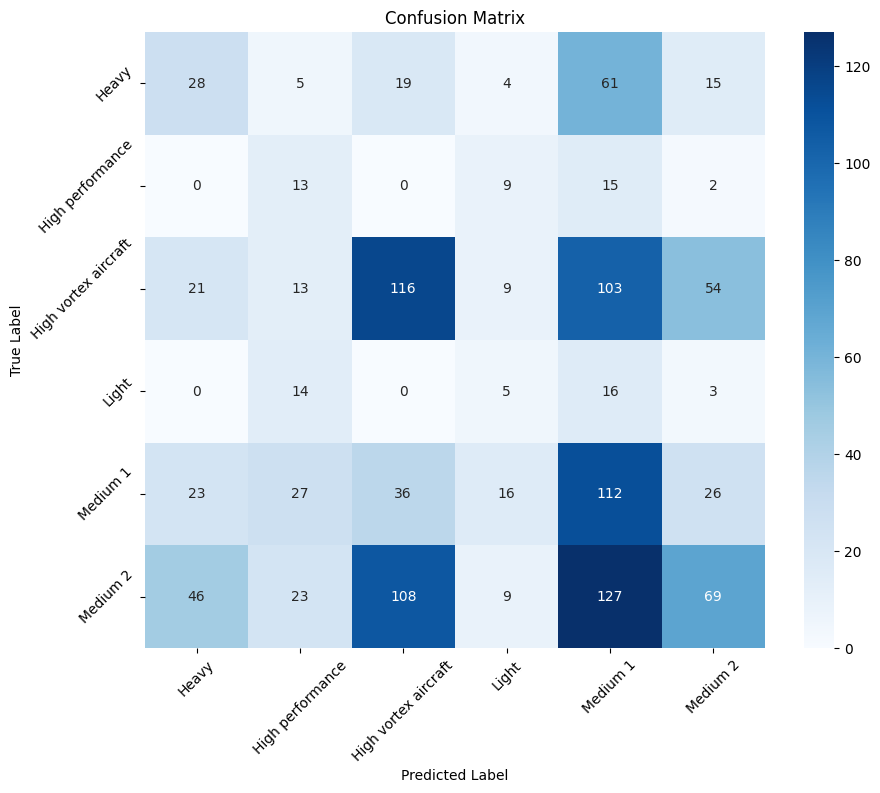

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Nombres reales de las clases
class_names = ["Heavy", "High performance", "High vortex aircraft", "Light", "Medium 1", "Medium 2"]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


## Uniendo las categorías Medium 1 y Medium 2

In [37]:
import pandas as pd

df_train = pd.read_parquet("../data/train.parquet")
df_test = pd.read_parquet("../data/test.parquet")

In [38]:
df_train["turbulence_category"] = df_train["turbulence_category"].replace({"Medium 1": "Medium", "Medium 2": "Medium"})
df_test["turbulence_category"] = df_test["turbulence_category"].replace({"Medium 1": "Medium", "Medium 2": "Medium"})

In [40]:
import pandas as pd

# Crear una nueva columna 'date' solo con la fecha (sin la hora)
df_train['date'] = df_train['timestamp'].dt.date
df_test['date'] = df_test['timestamp'].dt.date

# Agrupar por 'callsign' y 'date' y elegir una fila aleatoria de cada grupo
df_train = df_train.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)
df_test = df_test.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)

/tmp/ipykernel_136717/3883204618.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train = df_train.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)
/tmp/ipykernel_136717/3883204618.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_test.groupby(['callsign', 'date']).apply(lambda x: x.sample(1)).reset_index(drop=True)


In [41]:
# Ver las distribuciones de clases después de la modificación
print("Distribución de clases en df_train después de combinar:")
print(df_train["turbulence_category"].value_counts())

print("\nDistribución de clases en df_test después de combinar:")
print(df_test["turbulence_category"].value_counts())

Distribución de clases en df_train después de combinar:
turbulence_category
Medium                  2603
High vortex aircraft    1250
Heavy                    557
Light                    173
High performance         169
Name: count, dtype: int64

Distribución de clases en df_test después de combinar:
turbulence_category
Medium                  622
High vortex aircraft    316
Heavy                   132
High performance         39
Light                    38
Name: count, dtype: int64


Preprocesamiento de las características

In [42]:
from sklearn.preprocessing import LabelEncoder
# Codificar la variable objetivo en números
le = LabelEncoder()
df_train['turbulence_category'] = le.fit_transform(df_train['turbulence_category'])
df_test['turbulence_category'] = le.transform(df_test['turbulence_category'])

# Separar las características (features) y las etiquetas (labels)
y_train = df_train['turbulence_category']
df_train = df_train.drop(columns=['turbulence_category'])

y_test = df_test['turbulence_category']
df_test = df_test.drop(columns=['turbulence_category'])

In [43]:
# Booleanas True/False a enteros 1/0
bool_cols = ['Z1', 'KA6', 'KA8', 'K3', 'K2', 'K1', 'Y1', 'Y2', 'Y3', 'Y7', 'Z6', 'Z4', 
             'Z2', 'Z3', 'LF', 'L1', 'LA', 'LB', 'LC', 'LD', 'LE', '36R_18L', '32R_14L', '36L_18R', '32L_14R', 'is_holiday']

df_train[bool_cols] = df_train[bool_cols].astype(int)
df_test[bool_cols] = df_test[bool_cols].astype(int)

In [44]:
# --- Codificamos "operator" reduciendo el número de aerolíneas ---

# Paso 1: Encontrar las 7 aerolíneas más frecuentes en train
top_operators = df_train['operator'].value_counts().nlargest(7).index.tolist()

# Paso 2: Crear nueva columna, donde:
# - Si el operator está en top_operators → lo dejamos igual
# - Si no → lo reemplazamos por "other"

def map_operator(op):
    return op if op in top_operators else 'other'

df_train['operator_grouped'] = df_train['operator'].apply(map_operator)
df_test['operator_grouped'] = df_test['operator'].apply(map_operator)

In [45]:
# --- OneHot Encoding ---
ohe_cols = ['operator_grouped', 'runway', 'holding_point', 'last_event_turb_cat', 'weekday']

df_train = pd.get_dummies(df_train, columns=ohe_cols, drop_first=False, dtype="int")
df_test = pd.get_dummies(df_test, columns=ohe_cols, drop_first=False, dtype="int")

In [46]:
# --- Normalizamos columnas numéricas ---

from sklearn.preprocessing import StandardScaler

# Lista de columnas numéricas
numeric_columns = [
    'takeoff_time', 'last_min_takeoffs', 'last_min_landings', 'time_since_last_event_seconds', 
    'time_before_holding_point', 'time_at_holding_point', 'hour',
    'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)', 
    'precipitation (mm)', 'snowfall (cm)', 'weather_code (wmo code)', 
    'surface_pressure (hPa)', 'cloud_cover (%)', 'cloud_cover_low (%)', 
    'cloud_cover_mid (%)', 'cloud_cover_high (%)', 'is_day ()', 'wind_speed_10m (km/h)', 
    'wind_direction_10m (°)', 'wind_direction_100m (°)', 'soil_moisture_0_to_7cm (m³/m³)', 
    'soil_temperature_100_to_255cm (°C)', 'soil_moisture_100_to_255cm (m³/m³)', 
    'et0_fao_evapotranspiration (mm)'
]

# Creamos el scaler
scaler = StandardScaler()

# Aplicamos la normalización
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [47]:
# --- Eliminamos columnas innecesarias ---
cols_to_exclude = ["timestamp", "icao", "callsign", "operator", "date"]

df_train = df_train.drop(columns=cols_to_exclude)
df_test = df_test.drop(columns=cols_to_exclude)

In [48]:
pd.set_option('display.max_columns', None)
df_train.head()

,takeoff_time,last_min_takeoffs,last_min_landings,time_since_last_event_seconds,time_before_holding_point,time_at_holding_point,hour,is_holiday,Z1,KA6,KA8,K3,K2,K1,Y1,Y2,Y3,Y7,Z6,Z4,Z2,Z3,LF,L1,LA,LB,LC,LD,LE,36R_18L,32R_14L,36L_18R,32L_14R,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),snowfall (cm),weather_code (wmo code),surface_pressure (hPa),cloud_cover (%),cloud_cover_low (%),cloud_cover_mid (%),cloud_cover_high (%),is_day (),wind_speed_10m (km/h),wind_direction_10m (°),wind_direction_100m (°),soil_moisture_0_to_7cm (m³/m³),soil_temperature_100_to_255cm (°C),soil_moisture_100_to_255cm (m³/m³),et0_fao_evapotranspiration (mm),operator_grouped_AEA,operator_grouped_ANE,operator_grouped_IBB,operator_grouped_IBE,operator_grouped_IBS,operator_grouped_QTR,operator_grouped_RYR,operator_grouped_other,runway_32L/14R,runway_32R/14L,runway_36L/18R,runway_36R/18L,holding_point_K1,holding_point_K2,holding_point_K3,holding_point_LA,holding_point_LB,holding_point_LC,holding_point_LD,holding_point_LE,holding_point_Y1,holding_point_Y2,holding_point_Y3,holding_point_Z1,holding_point_Z2,holding_point_Z3,holding_point_Z4,holding_point_Z6,last_event_turb_cat_Ground obstruction,last_event_turb_cat_Heavy,last_event_turb_cat_High performance,last_event_turb_cat_High vortex aircraft,last_event_turb_cat_Light,last_event_turb_cat_Medium 1,last_event_turb_cat_Medium 2,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,-0.802462,0.027448,0.554232,-0.317130,-0.325856,0.422141,-0.659598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0.486531,1.045494,1.296438,-0.146923,0.0,-0.073939,-0.669422,1.091325,0.335728,0.117953,1.531451,0.746332,0.565117,-0.919058,-0.682058,0.620759,1.372833,-0.335589,-0.794285,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,-0.802462,0.027448,-0.969905,1.530545,2.096168,-0.313001,-0.659598,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,-0.787795,0.010647,-0.740485,-0.146923,0.0,-0.073939,-1.321749,1.091325,1.880317,2.904348,-0.850094,0.746332,-0.038668,-1.115177,-0.883937,-0.211312,0.171426,-0.335589,-0.676322,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,-0.605758,0.027448,-0.969905,-0.285273,2.957637,-0.415579,-1.538568,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.193262,1.102986,-0.545461,-0.146923,0.0,-0.358134,0.021278,-0.974659,-0.737631,-0.535646,-0.540493,-1.339886,-0.360687,-1.185780,-0.782998,0.430076,0.832200,-0.335589,-0.912247,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,-0.715038,0.027448,0.554232,-0.182625,0.613971,-0.518157,-0.220113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,-0.536791,0.758037,-0.003726,-0.146923,0.0,-0.073939,-0.362444,1.091325,1.880317,0.599552,-0.850094,0.746332,-1.044978,-0.393458,-0.058067,-0.020629,0.051285,-0.335589,-0.558360,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,-0.704110,1.415012,-0.969905,-0.281734,0.001738,-0.159134,-0.439855,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,-0.671947,-0.161828,-0.740485,-0.146923,0.0,-0.358134,1.153257,-1.188382,-0.632913,-0.535646,-0.850094,0.746332,0.484613,-1.193625,-1.076641,-0.627347,-0.309137,-0.335589,-0.440398,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


Arreglamos desajuste en el número de columnas

In [49]:
print(len(df_train.columns), len(df_test.columns))

94 92


In [50]:
# Columnas en train y no en test
for col in df_train.columns:
    if col not in df_test.columns:
        print(col)
        df_test[col] = 0

holding_point_LD
holding_point_Z6
last_event_turb_cat_Ground obstruction


In [51]:
# Columnas en test y no en train
for col in df_test.columns:
    if col not in df_train.columns:
        print(col)
        df_train[col] = 0

last_event_turb_cat_Reserved


Balanceo de clases

In [52]:
y_train_df = pd.DataFrame(y_train, columns=['turbulence_category'])
y_train_df["turbulence_category"].value_counts()

turbulence_category
4    2603
2    1250
0     557
3     173
1     169
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

X = df_train
y = y_train_df

# Aplicar SMOTE para oversampling en clases minoritarias
smote = SMOTE(sampling_strategy='auto', random_state=22)
X_train_res, y_train_res = smote.fit_resample(X, y)

In [54]:
y_train_res["turbulence_category"].value_counts()

turbulence_category
4    2603
2    2603
3    2603
0    2603
1    2603
Name: count, dtype: int64

In [55]:
X_train_resampled = X_train_res.to_numpy()
y_train_resampled = y_train_res["turbulence_category"].values

In [56]:
X_test = df_test.to_numpy()
y_test = y_test.to_numpy()

### Definición del modelo

In [57]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import numpy as np

# Modelo One-vs-All
def one_vs_all_model(X, y, num_classes):
    N, D = X.shape
    alpha = numpyro.sample('alpha', dist.Normal(0., 1.).expand([num_classes, D]))
    beta = numpyro.sample('beta', dist.Normal(0., 1.).expand([num_classes]))
    
    with numpyro.plate('data', N):
        logits = jnp.dot(X, alpha.T) + beta  # (N, num_classes)
        numpyro.sample('obs', dist.Categorical(logits=logits), obs=y)

In [58]:
import jax
print(jax.devices())  # Verifica que esté usando la GPU

[CudaDevice(id=0)]


In [59]:
# Convertir las etiquetas en formato One-vs-All (uno contra todos)
#y_train_res_ovo = np.array([[1 if i == label else 0 for i in range(len(np.unique(y_train_res)))] for label in y_train_res])

# Establecer el modelo y realizar el muestreo
num_classes = len(np.unique(y_train_resampled))
nuts_kernel = NUTS(one_vs_all_model)
mcmc = MCMC(nuts_kernel, num_samples=1000, num_warmup=500)
mcmc.run(jax.random.PRNGKey(0), X_train_resampled, y_train_resampled, num_classes)

# Extraer los resultados
posterior_samples = mcmc.get_samples()

sample: 100%|██████████| 1500/1500 [13:44<00:00,  1.82it/s, 511 steps of size 1.49e-02. acc. prob=0.86] 


In [60]:
# Función de predicción
def predict(X, alpha, beta):
    logits = jnp.dot(X, alpha.T) + beta
    return jnp.argmax(logits, axis=1)

# Predecir en los datos de prueba
alpha = posterior_samples['alpha']
beta = posterior_samples['beta']

alpha_mean = jnp.mean(alpha, axis=0)  # (num_clases, D)
beta_mean = jnp.mean(beta, axis=0)    # (num_clases,)

y_pred = predict(X_test, alpha_mean, beta_mean)

In [61]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Calcular accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Calcular precision, recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Reporte completo
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4194
Precision: 0.4460
Recall: 0.4194
F1 Score: 0.4302
Confusion Matrix:
[[ 27   5  26   6  68]
 [  0  12   2   8  17]
 [ 28  16 122   7 143]
 [  0   9   1   6  22]
 [ 62  57 154  35 314]]

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.20      0.22       132
           1       0.12      0.31      0.17        39
           2       0.40      0.39      0.39       316
           3       0.10      0.16      0.12        38
           4       0.56      0.50      0.53       622

    accuracy                           0.42      1147
   macro avg       0.28      0.31      0.29      1147
weighted avg       0.45      0.42      0.43      1147



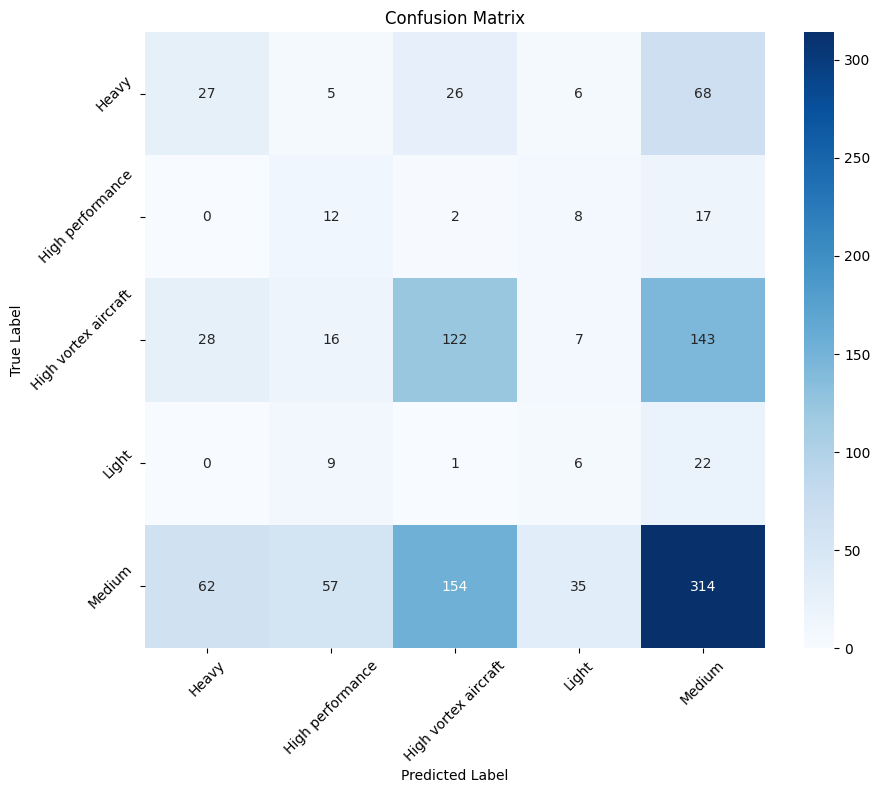

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Nombres reales de las clases
class_names = ["Heavy", "High performance", "High vortex aircraft", "Light", "Medium"]

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()